#Linking GitHub Datasets

In [19]:
!git clone https://github.com/picklesueat/data_jobs_data.git


Cloning into 'data_jobs_data'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 85 (delta 41), reused 8 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (85/85), 14.09 MiB | 3.46 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [20]:
!ls data_jobs_data/data

BusinessAnalyst.csv  DataAnalyst.csv  DataEngineer.csv	DataScientist.csv


In [21]:

%cd "data_jobs_data/data"
!ls


/content/data_jobs_data/data/data_jobs_data/data
BusinessAnalyst.csv  DataAnalyst.csv  DataEngineer.csv	DataScientist.csv


#Loading the dataset

In [22]:
import pandas as pd

dataEngineer = pd.read_csv("DataEngineer.csv")
dataEngineer.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


In [23]:
dataEngineer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Type of ownership  2528 non-null   object 
 10  Industry           2528 non-null   object 
 11  Sector             2528 non-null   object 
 12  Revenue            2528 non-null   object 
 13  Competitors        2528 non-null   object 
 14  Easy Apply         2528 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 296.4+ KB


#Data Cleaning


In [24]:
# Select only the columns you want into a new dataframe
dataEngineer_df = dataEngineer[["Job Title", "Job Description", "Company Name", "Location", "Industry", "Sector","Rating"]].copy()

In [25]:
dataEngineer_df.head()

,Job Title,Job Description,Company Name,Location,Industry,Sector,Rating
0,Data Engineer,Company Description\nSagence is a management a...,Sagence\n4.5,"New York, NY",Consulting,Business Services,4.5
1,Senior Data Engineer (Healthcare Domain experi...,"Key Responsibilities\n\n- Architect, build, an...",Enterprise Integration\n3.4,"New York, NY",IT Services,Information Technology,3.4
2,Data Engineers,Overview\n\nJob description\n\nPosition Overvi...,Maestro Technologies\n5.0,"New York, NY",IT Services,Information Technology,5.0
3,Client Trade Support Engineer,About the Position\n\n\nThis position will sup...,Jane Street\n4.8,"New York, NY",Investment Banking & Asset Management,Finance,4.8
4,Data Engineer,Data Engineer\n\nJob Details\nLevel\nExperienc...,GNY Insurance Companies\n3.7,"New York, NY",Insurance Carriers,Insurance,3.7


## Checking for the unqiue values

In [26]:
for col in ["Job Title", "Company Name", "Location", "Industry", "Sector"]:
    print(f"{col}: {dataEngineer[col].nunique()} unique values")



Job Title: 1260 unique values
Company Name: 1457 unique values
Location: 113 unique values
Industry: 84 unique values
Sector: 25 unique values


## Removing NULL rows

In [27]:
dataEngineer_df.dropna(subset=["Job Title", "Company Name", "Location"], inplace=True)

## Coverting values into string - removing extra spaces

In [28]:
for col in ["Job Title", "Company Name", "Location", "Industry", "Sector"]:
    dataEngineer_df[col] = dataEngineer_df[col].astype(str).str.strip()

## Normalize Whitespace in Job Descriptions

In [29]:
dataEngineer_df["Job Description"] = dataEngineer_df["Job Description"].str.replace(r"\s+", " ", regex=True).str.strip()
dataEngineer_df.head()

,Job Title,Job Description,Company Name,Location,Industry,Sector,Rating
0,Data Engineer,Company Description Sagence is a management ad...,Sagence\n4.5,"New York, NY",Consulting,Business Services,4.5
1,Senior Data Engineer (Healthcare Domain experi...,"Key Responsibilities - Architect, build, and m...",Enterprise Integration\n3.4,"New York, NY",IT Services,Information Technology,3.4
2,Data Engineers,Overview Job description Position Overview: Se...,Maestro Technologies\n5.0,"New York, NY",IT Services,Information Technology,5.0
3,Client Trade Support Engineer,About the Position This position will support ...,Jane Street\n4.8,"New York, NY",Investment Banking & Asset Management,Finance,4.8
4,Data Engineer,Data Engineer Job Details Level Experienced Jo...,GNY Insurance Companies\n3.7,"New York, NY",Insurance Carriers,Insurance,3.7


## Cleaning the Company format

In [30]:
dataEngineer_df["Company Name"] = dataEngineer_df["Company Name"].str.replace(r"\n\d+(\.\d+)?", "", regex=True).str.strip()
dataEngineer_df.head()

,Job Title,Job Description,Company Name,Location,Industry,Sector,Rating
0,Data Engineer,Company Description Sagence is a management ad...,Sagence,"New York, NY",Consulting,Business Services,4.5
1,Senior Data Engineer (Healthcare Domain experi...,"Key Responsibilities - Architect, build, and m...",Enterprise Integration,"New York, NY",IT Services,Information Technology,3.4
2,Data Engineers,Overview Job description Position Overview: Se...,Maestro Technologies,"New York, NY",IT Services,Information Technology,5.0
3,Client Trade Support Engineer,About the Position This position will support ...,Jane Street,"New York, NY",Investment Banking & Asset Management,Finance,4.8
4,Data Engineer,Data Engineer Job Details Level Experienced Jo...,GNY Insurance Companies,"New York, NY",Insurance Carriers,Insurance,3.7


## Checking unquie values in the dataset

In [31]:
for col in ["Company Name", "Location", "Industry", "Sector"]:
    print(f"\nUnique values in '{col}':")
    print(dataEngineer_df[col].unique())


Unique values in 'Company Name':
['Sagence' 'Enterprise Integration' 'Maestro Technologies' ...
 'Albin Engineering Services' 'Cincinnati Bell Technology Solutions'
 'SPECTRAFORCE TECHNOLOGIES Inc.']

Unique values in 'Location':
['New York, NY' 'Jersey City, NJ' 'Hackensack, NJ' 'Saddle Brook, NJ'
 'Secaucus, NJ' 'Parsippany, NJ' 'Newark, NJ' 'Bloomfield, NJ'
 'Holmdel, NJ' 'Fort Lee, NJ' 'Santa Monica, CA' 'Los Angeles, CA'
 'Culver City, CA' 'Glendale, CA' 'Hawthorne, CA' 'Pasadena, CA'
 'Woodland Hills, CA' 'Marina del Rey, CA' 'Burbank, CA' 'Anaheim, CA'
 'El Segundo, CA' 'Universal City, CA' 'Walnut, CA' 'Wilmington, CA'
 'Encino, CA' 'Brea, CA' 'Northridge, CA' 'Long Beach, CA'
 'Sherman Oaks, CA' 'Century City, CA' 'Cerritos, CA'
 'North Hollywood, CA' 'Chicago, IL' 'Elk Grove Village, IL'
 'Downers Grove, IL' 'Elmhurst, IL' 'Rosemont, IL' 'Des Plaines, IL'
 'Houston, TX' 'Deer Park, TX' 'Chandler, AZ' 'Tempe, AZ' 'Scottsdale, AZ'
 'Phoenix, AZ' 'Glendale, AZ' 'DC Ranch, AZ' '

## Data Viz - Top Job titles

/tmp/ipython-input-4254247246.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="viridis")


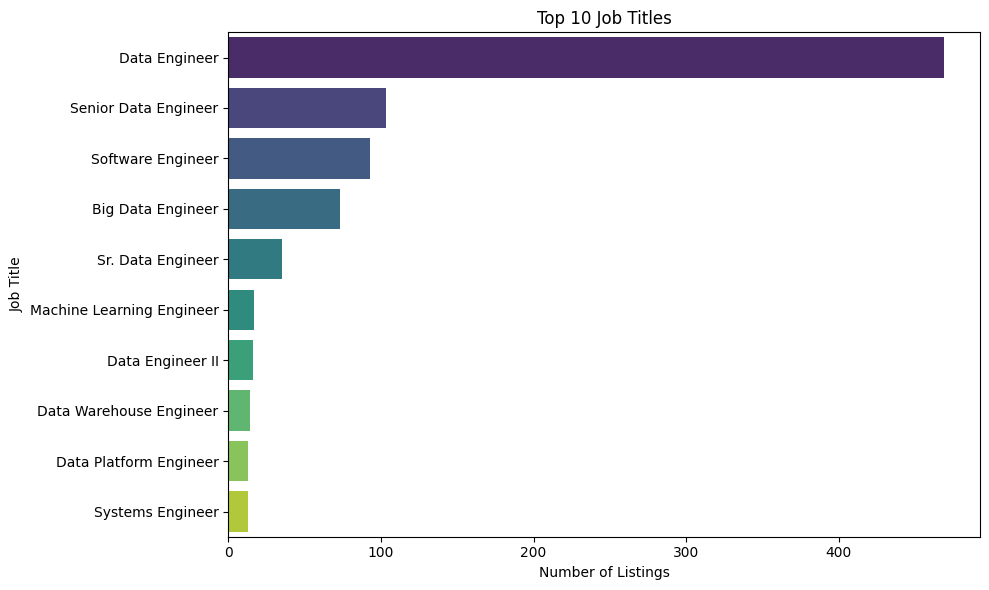

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

top_job_titles = dataEngineer_df["Job Title"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="viridis")
plt.title("Top 10 Job Titles")
plt.xlabel("Number of Listings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

# Saving the cleaned dataset

In [33]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Define the directory path
save_dir = '/content/drive/My Drive/CleanDatasets'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the dataframe to the specified directory
dataEngineer_df.to_csv(f'{save_dir}/cleaned_dataEngineer.csv', index=False)
print(f"Cleaned dataset saved to Google Drive in '{save_dir}'.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cleaned dataset saved to Google Drive in '/content/drive/My Drive/CleanDatasets'.
